# Maersk Data Challenge

## Objective 
Generation of forecasting models to forecast ***Sourcing Cost*** for the Month Jun-2021

In [118]:
# Importing required libraries

import pandas as pd  # for data analysis and manipulation 
import matplotlib.pyplot as plt # for creating plots
import numpy as np # for working with arrays
from dateutil.parser import parse # for conversion of string data into datetime format

In [119]:
# loading the data and checking the shape of the data

training_df = pd.read_csv('training_data_maersk.csv')
print("The shape of the dataset is ", training_df.shape)

The shape of the dataset is  (550176, 8)


In [120]:
# Checking for each column (except Sourcing Cost) what are the unique data points

print('The keys of the dataframe are :')
list_of_keys =  list(training_df.columns)
print(list_of_keys)
print("***---****----")

for key in list_of_keys[:-1]:
    temp_df =  training_df[key]
    print("Unique element in column  : " + key)
    print(temp_df.unique())
    print("Number of Unique Elements in Column " + key + "  is  " +str(len(temp_df.unique())))
    print("****----------****-------------")

The keys of the dataframe are :
['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost']
***---****----
Unique element in column  : ProductType
['NTM3' 'NTM2' 'NTM1']
Number of Unique Elements in Column ProductType  is  3
****----------****-------------
Unique element in column  : Manufacturer
['X1' 'X2' 'X3']
Number of Unique Elements in Column Manufacturer  is  3
****----------****-------------
Unique element in column  : Area Code
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
Number of Unique Elements in Column Area Code  is  45
****----------****-------------
Unique element in column  : Sourcing Channel
['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']
Number of Unique Elements in Column Sourcing Cha

# Hypothesis

On visual inspection of data in MS-Excel, it was observed that in most cases, one ***Area Code*** was being served by a single ***Manufacturer*** through a single ***Sourcing Channel*** delivering a particular ***Product Type*** of a fixed ***Product Size***.

Based on this a hypothesis was formulated, that the data corresponding to each unique ***Area Code*** was entirely made up of one unqiue combination of ***Manufacturer***, ***Product Type***,***Product Size*** and ***Sourcing Channel***

To verify this hypothesis, out of the 45 ***Area Code***, 5 ***Area Code*** were randomly sampled and unique combinations serving those ***Area Code*** were verified. 

In [121]:
# Get the unique list of area code
area_code_list = list(training_df["Area Code"].unique())
print(area_code_list)

['A28', 'A9', 'A20', 'A18', 'A10', 'A19', 'A29', 'A7', 'A2', 'A8', 'A4', 'A6', 'A30', 'A35', 'A44', 'A45', 'A31', 'A25', 'A37', 'A32', 'A34', 'A46', 'A11', 'A39', 'A41', 'A17', 'A38', 'A5', 'A22', 'A3', 'A12', 'A24', 'A36', 'A42', 'A14', 'A43', 'A33', 'A15', 'A40', 'A21', 'A16', 'A13', 'A1', 'A23', 'A26']


In [122]:
# randomly get 5 Area Code to verfiy claim (seed for reproducibility)
np.random.seed(9)
random_idx = list(np.random.randint(1,len(training_df["Area Code"].unique()),5))

In [123]:
# printing the head and tail of each Area Code data to verify hypothesis (Only 1 experiment out of the many performed being shown to keep the notebook concise)
for area_code_idx in random_idx:
    sample_area_code = area_code_list[area_code_idx]
    sample_df =  training_df[training_df["Area Code"]== sample_area_code]
    with pd.option_context('expand_frame_repr', False):
        print(sample_df.head(5).append(sample_df.tail(5)))
    print("****----****-----****")

       ProductType Manufacturer Area Code Sourcing Channel Product Size Product Type Month of Sourcing  Sourcing Cost
138663        NTM2           X1        A3           DIRECT        Small       Powder            Nov-20         139.90
138680        NTM2           X1        A3           DIRECT        Small       Powder            Aug-20         137.52
138692        NTM2           X1        A3           DIRECT        Small       Powder            Apr-21         150.54
138727        NTM1           X1        A3           DIRECT        Large       Liquid            Sep-20         154.60
138740        NTM1           X1        A3           DIRECT        Large       Powder            Aug-20         110.89
550127        NTM2           X1        A3           DIRECT        Small       Powder            Feb-21         150.85
550137        NTM2           X1        A3           DIRECT        Small       Powder            Oct-20         133.58
550143        NTM1           X1        A3           DIRE

# Observations

It was observed that for most cases. one ***Area Code*** was being served by a unique combination. There were some ***Area Code*** were different ***Sourcing Channel*** were used within the same ***Area Code***, there were some ***Area Code*** were different ***Product Type*** and ***Product Size*** was sourced within the same ***Area Code***. There were also a very few ***Area Code*** which were served by different ***Manufacturer**

# TakeAways

If the hypothesis of 1 unique combination serving 1 ***Area Code*** was true, then it would result in 45 time series models to forecast ***Sourcing Cost*** for each ***Area Code***. Since the hypothesis is not true, the theoretical number of models which will be needed to accurately do forecasting for a particular unique combination are: 

3 (ProductType) x 3 (Manufacturer) x 45 (Area Code) x 4 (Sourcing Channel) x 2 (Product Type) x 3 (Product Size) = 9720 unique combinations/9720 models

This although is a theoretical number, in practicality we have seen that most ***Area Code***  is served by a single unique combination. This means that we would need somewhere between 45 models and 9720 models to do accurate time-series forecasting for each unique combination

The lower bound of 45 is also dependent on the number of unique ***Area Code*** being served and if in future unique count of ***Area Code*** scales up, the lower bound of number of required models also scales up.

In the current form, assuming 45 models (1 for each ***Area Code***) serves our purpose of forecasting, it is ***not*** a scalable solution. To build a scalable solution, we need to group similar time-series together intelligently and separate those are different and perform modeling on similiar time-series together. This would impact the accuracy a little but it is a trade-off for ***scalability***

# Grouping Similar Time-Series Together

Since the quantum of time in this dataset is a month, similarity/dissimilarity assumptions are tested on a month's data. First, a random month is picked and using statistics similar data is grouped together and dissimilar data is separated for modeling. This is repeated on 3 seperate month's data to ensure that these assumptions hold true.

The idea is to use descriptive statistics (mean and median) to find out which data can be grouped together. The idea is that in a subset of similar time-series data, the variance of mean and median of a unique elements of a column should be less (Eg:- if for Sourcing Channel, the mean and median of RETAIL and DIRECT are similar we will treat it as similar time series and model them together). We keep on splitting the data until the mean and median of individual component of each column becomes more or less similar. The structure of this splitting logic resembles a tree like structure

In [124]:
# selecting 3 random months from the unique 11 months in the dataset (seed for reproducibility)
np.random.seed(8)
random_month_idx = list(np.random.randint(1,len(training_df["Month of Sourcing"].unique()),3))
print(random_month_idx)
print(training_df["Month of Sourcing"].unique())

[4, 5, 2]
['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20']


In [125]:
# 3 slice of dataset for 3 randomly picked month to verify our assumptions
assumption1_df = training_df[training_df["Month of Sourcing"] == training_df["Month of Sourcing"].unique()[4]]
assumption2_df = training_df[training_df["Month of Sourcing"] == training_df["Month of Sourcing"].unique()[5]]
assumption3_df = training_df[training_df["Month of Sourcing"] == training_df["Month of Sourcing"].unique()[2]]

In [126]:
assumption1_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
8,NTM3,X1,A18,RETAIL,Large,Liquid,Nov-20,154.04
14,NTM2,X1,A2,DIRECT,Large,Powder,Nov-20,172.51
15,NTM2,X1,A2,DIRECT,Large,Powder,Nov-20,173.91
17,NTM2,X1,A6,DIRECT,Large,Powder,Nov-20,150.02


# Assumption Testing on First Random Month

In [127]:
print(assumption1_df.groupby(["ProductType"]).agg(["mean","median"]))
print(assumption1_df.groupby(["Manufacturer"]).agg(["mean","median"]))
print(assumption1_df.groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(assumption1_df.groupby(["Product Size"]).agg(["mean","median"]))
print(assumption1_df.groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           109.984835  138.70
NTM2           119.764429  138.17
NTM3            74.550019   65.43
             Sourcing Cost        
                      mean  median
Manufacturer                      
X1              123.112588  138.70
X2               57.178501   26.94
X3               54.019449   52.66
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT              105.498398  137.36
ECOM                147.756885  140.16
RETAIL               84.445429   64.34
WHOLESALE            54.819533   21.66
             Sourcing Cost        
                      mean  median
Product Size                      
ExtraLarge      269.637930   98.46
Large           105.382826  137.67
Small           108.606590  112.32
             Sourcing Cost        
                      mean  median
Product Type                     

# Assumption Testing on Second Random Month

In [128]:
print(assumption2_df.groupby(["ProductType"]).agg(["mean","median"]))
print(assumption2_df.groupby(["Manufacturer"]).agg(["mean","median"]))
print(assumption2_df.groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(assumption2_df.groupby(["Product Size"]).agg(["mean","median"]))
print(assumption2_df.groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           110.003630  135.24
NTM2           111.131014  121.49
NTM3            52.003013   48.15
             Sourcing Cost        
                      mean  median
Manufacturer                      
X1              105.671439  133.30
X2               67.445185   57.58
X3               50.606837   50.62
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT               97.077441  108.30
ECOM                136.321975  135.23
RETAIL               83.455607   64.35
WHOLESALE            40.154292   30.88
             Sourcing Cost        
                      mean  median
Product Size                      
ExtraLarge       59.631026   57.00
Large           101.401330  129.41
Small            88.785832   96.16
             Sourcing Cost        
                      mean  median
Product Type                     

# Assumption Testing on Third Random Month

In [129]:
print(assumption3_df.groupby(["ProductType"]).agg(["mean","median"]))
print(assumption3_df.groupby(["Manufacturer"]).agg(["mean","median"]))
print(assumption3_df.groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(assumption3_df.groupby(["Product Size"]).agg(["mean","median"]))
print(assumption3_df.groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           115.916773  144.10
NTM2           129.583733  144.28
NTM3            70.334422   64.33
             Sourcing Cost        
                      mean  median
Manufacturer                      
X1              127.465619  143.85
X2               59.280326   27.35
X3               55.755628   52.05
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT              113.716258  142.13
ECOM                147.628951  146.77
RETAIL               84.970657   65.44
WHOLESALE            55.175479   16.69
             Sourcing Cost        
                      mean  median
Product Size                      
ExtraLarge       83.483709   57.00
Large           111.568684  143.13
Small           115.494044  111.54
             Sourcing Cost        
                      mean  median
Product Type                     

<AxesSubplot:xlabel='Manufacturer'>

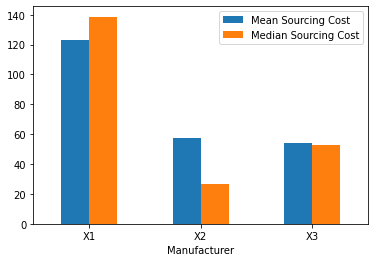

In [130]:
# merging the mean and median groupby for plotting and visualizing the difference in the mean and median for the 3 manufacturers (X1,X2 and X3)
manufacturer_mean_df = assumption1_df.groupby(by=["Manufacturer"]).mean().reset_index()
manufacturer_mean_df = manufacturer_mean_df.rename(columns = {"Sourcing Cost": "Mean Sourcing Cost"})


manufacturer_median_df = assumption1_df.groupby(by=["Manufacturer"]).median().reset_index()
manufacturer_median_df = manufacturer_median_df.rename(columns = {"Sourcing Cost": "Median Sourcing Cost"})

manufacturer = pd.merge(manufacturer_mean_df, manufacturer_median_df, how='inner')
manufacturer.plot.bar(x="Manufacturer", rot=0)

# First Level Separation of the Dataset

In all the 3 ***Month of Sourcing*** observations we can see that we can ***Manufacturer*** can provide a good separation in the ***Cost of Sourcing*** data. So the dataset is first split into ***x1_df***, ***x2_df*** and ***x3_df***. It is also presented visually in a bar plot showing the mean and median of the 3 different manufacturer. 

In [131]:
list_of_manufacturer = list(training_df["Manufacturer"].unique())
print(list_of_manufacturer)

['X1', 'X2', 'X3']


In [132]:
# separation of the dataset based on manufacturers. 

x1_df = training_df[training_df["Manufacturer"]==list_of_manufacturer[0]]
x2_df = training_df[training_df["Manufacturer"]==list_of_manufacturer[1]]
x3_df = training_df[training_df["Manufacturer"]==list_of_manufacturer[2]]

print("Samples in X1 : " + str(x1_df.shape))
print("Samples in X2 : " + str(x2_df.shape))
print("Samples in X3 : " + str(x3_df.shape))

Samples in X1 : (419857, 8)
Samples in X2 : (120695, 8)
Samples in X3 : (9624, 8)


## Checking the change in Descriptive Statistics after the split

In [133]:
# Descriptive Statistics of Manufacturer X1
print(x1_df[x1_df["Month of Sourcing"] == x1_df["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_df[x1_df["Month of Sourcing"] == x1_df["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x1_df[x1_df["Month of Sourcing"] == x1_df["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))
print(x1_df[x1_df["Month of Sourcing"] == x1_df["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           130.682735  138.13
NTM2           129.600039  135.86
NTM3            52.084133   48.15
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT              103.544479  133.62
ECOM                136.321975  135.23
RETAIL              144.976729  128.70
WHOLESALE            40.154292   30.88
             Sourcing Cost        
                      mean  median
Product Size                      
ExtraLarge       59.631026   57.00
Large           123.272129  135.98
Small            85.954793   96.16
             Sourcing Cost        
                      mean  median
Product Type                      
Liquid           92.091683   65.27
Powder          107.676890  133.62


In [134]:
# Descriptive Statistics of Manufacturer X2
print(x2_df[x2_df["Month of Sourcing"] == x2_df["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x2_df[x2_df["Month of Sourcing"] == x2_df["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x2_df[x2_df["Month of Sourcing"] == x2_df["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))
print(x2_df[x2_df["Month of Sourcing"] == x2_df["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM1            63.591404  36.87
NTM2            59.290825  43.52
NTM3            62.107778  19.18
                 Sourcing Cost       
                          mean median
Sourcing Channel                     
DIRECT               68.878670  74.77
RETAIL               36.527119  30.53
             Sourcing Cost       
                      mean median
Product Size                     
Large            51.575710  30.06
Small            92.346234  76.37
             Sourcing Cost       
                      mean median
Product Type                     
Liquid           25.137177  24.29
Powder           68.171675  68.00


In [135]:
# Descriptive Statistics of Manufacturer X3
print(x3_df[x3_df["Month of Sourcing"] == x3_df["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x3_df[x3_df["Month of Sourcing"] == x3_df["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x3_df[x3_df["Month of Sourcing"] == x3_df["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))
print(x3_df[x3_df["Month of Sourcing"] == x3_df["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM3            42.562282   46.8
                 Sourcing Cost       
                          mean median
Sourcing Channel                     
RETAIL               42.562282   46.8
             Sourcing Cost       
                      mean median
Product Size                     
Large            42.562282   46.8
             Sourcing Cost       
                      mean median
Product Type                     
Powder           42.562282   46.8


## First Separation Result 

We can already see that ***x3_df*** separates out perfectly based on 1 split, this data will be used to train a model which will predict the ***Month of Sourcing*** when the ***Manufacturer*** = ***X3***. In the rest of the data, we see that for all the groupby the max and minimum mean has come closer. Wherever it is relatively, high we will use to further split the data 

# Second Level Separation of the Dataset 

Based on the descriptive statistics obtained after the split for the 3 dataset, 

For, 
***Manufacturer*** = ***X1*** we see that ***Product Size*** shows variation so we can split it further based on ***Product Size***, into ***X1_Large***, ***X1_ExtraLarge*** and ***X1_Small***

For, 
***Manufacturer*** = ***X2*** we see that ***Product Type*** shows variation so we can split it further based on ***Product Type***, into ***X2_Liquid*** and ***X2_Powder***

## For Manufacturer X1

In [136]:
# For manufacturer X1, the dataset is split on the basis of Product Size
x1_extralarge = x1_df[x1_df["Product Size"] == "ExtraLarge"]
x1_large = x1_df[x1_df["Product Size"] == "Large"]
x1_small = x1_df[x1_df["Product Size"] == "Small"]

## Checking the change in Descriptive Statistics after Split


In [137]:
# Descriptive Statistics for data when Manufacturer = X1 and Product Size = ExtraLarge
print(x1_extralarge[x1_extralarge["Month of Sourcing"] == x1_extralarge["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_extralarge[x1_extralarge["Month of Sourcing"] == x1_extralarge["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x1_extralarge[x1_extralarge["Month of Sourcing"] == x1_extralarge["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM3            65.866667   57.0
                 Sourcing Cost       
                          mean median
Sourcing Channel                     
DIRECT               65.866667   57.0
             Sourcing Cost       
                      mean median
Product Type                     
Powder           65.866667   57.0


In [138]:
# Descriptive Statistics for data when Manufacturer = X1 and Product Size = Large
print(x1_large[x1_large["Month of Sourcing"] == x1_large["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_large[x1_large["Month of Sourcing"] == x1_large["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x1_large[x1_large["Month of Sourcing"] == x1_large["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           150.580802  146.61
NTM2           156.798970  147.87
NTM3            73.032145   66.56
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT              131.067226  143.88
ECOM                140.854329  142.76
RETAIL              142.338997  128.69
WHOLESALE            23.788352    4.81
             Sourcing Cost        
                      mean  median
Product Type                      
Liquid          123.986078  144.57
Powder          134.986437  142.91


In [139]:
# Descriptive Statistics for data when Manufacturer = X1 and Product Size = Small
print(x1_small[x1_small["Month of Sourcing"] == x1_small["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_small[x1_small["Month of Sourcing"] == x1_small["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x1_small[x1_small["Month of Sourcing"] == x1_small["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1            98.796100  104.10
NTM2           116.895193  133.58
NTM3            58.484154   54.55
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT               95.419295   96.40
ECOM                136.617905  136.02
RETAIL               65.732996   64.35
WHOLESALE           104.525143  104.90
             Sourcing Cost       
                      mean median
Product Type                     
Liquid           82.053735  65.16
Powder           95.488543  97.13


## For manufacturer X2

In [140]:
# For manufacturer X2, the dataset is split on the basis of Product Type
x2_liquid = x2_df[x2_df["Product Type"] == "Liquid"]
x2_powder = x2_df[x2_df["Product Type"] == "Powder"]

## Checking the change in Descriptive Statistics after Split

In [141]:
# Descriptive Statistics for data when Manufacturer = X2 and Product Type = Liquid
print(x2_liquid[x2_liquid["Month of Sourcing"] == x2_liquid["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x2_liquid[x2_liquid["Month of Sourcing"] == x2_liquid["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x2_liquid[x2_liquid["Month of Sourcing"] == x2_liquid["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM1            25.137177  24.29
                 Sourcing Cost       
                          mean median
Sourcing Channel                     
DIRECT               25.137177  24.29
             Sourcing Cost       
                      mean median
Product Size                     
Large            25.137177  24.29


In [142]:
# Descriptive Statistics for data when Manufacturer = X2 and Product Type = Powder
print(x2_powder[x2_powder["Month of Sourcing"] == x2_powder["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x2_powder[x2_powder["Month of Sourcing"] == x2_powder["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))
print(x2_powder[x2_powder["Month of Sourcing"] == x2_powder["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM1            81.652545  74.78
NTM2            59.290825  43.52
NTM3            62.107778  19.18
                 Sourcing Cost       
                          mean median
Sourcing Channel                     
DIRECT               80.067201  76.79
RETAIL               36.527119  30.53
             Sourcing Cost       
                      mean median
Product Size                     
Large            58.464378  36.87
Small            92.346234  76.37


## Second Separation Result 

For,
Manufacturer ***X1***, Splitting on the basis of ***Product Size*** yields ***X1_ExtraLarge*** data which is separted completely, the rest needs another level of seperation to make sure the mean are close enough to be handled by a single model. 

For,
Manufacturer ***X2***, Splitting on the basis of ***Product Type*** yields ***X2_Liquid*** data which is separted completely, the rest needs another level of seperation to make sure the mean are close enough to be handled by a single model. 

# Third Level Separation of the Dataset


For,
***Manufacturer*** = ***X1*** and ***Product Size*** = ***Large***, the data is further split on the basis of ***Sourcing Channel***

For,
***Manufacturer*** = ***X1*** and ***Product Size*** = ***Small***, the data is further split on the basis of ***Product Type***

For,
***Manufacturer*** = ***X2*** and ***Product Type*** = ***Powder***, the data is further split on the basis of ***Sourcing Channel***



## For Manufacturer X1 and Product Size Large

In [143]:
# for manufacturer x1 and product type large, the dataset is further split based on sourcing channel [WHOLESALE and Others (RETAIL,DIRECT,ECOM)] based on the descriptive statistics
x1_large_other_channel  = x1_large[(x1_large["Sourcing Channel"] == "DIRECT") | (x1_large["Sourcing Channel"] == "RETAIL") | (x1_large["Sourcing Channel"] == "ECOM")]
x1_large_wholesale = x1_large[x1_large["Sourcing Channel"] == "WHOLESALE"]

## Checking Descriptive Statistics after Split

In [144]:
# Descriptive Statistics when manufacturer is x1, product size is large and sourcing channel is other channel (RETAIL, ECOM, DIRECT)
print(x1_large_other_channel[x1_large_other_channel["Month of Sourcing"] == x1_large_other_channel["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_large_other_channel[x1_large_other_channel["Month of Sourcing"] == x1_large_other_channel["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           148.090193  148.41
NTM2           146.121239  148.41
NTM3            88.285944  118.49
             Sourcing Cost        
                      mean  median
Product Type                      
Liquid          140.305568  149.72
Powder          130.630693  143.92


In [145]:
# Descriptive Statistics when manufacturer is x1, product size is large and sourcing channel is WHOLESALE
print(x1_large_wholesale[x1_large_wholesale["Month of Sourcing"] == x1_large_wholesale["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_large_wholesale[x1_large_wholesale["Month of Sourcing"] == x1_large_wholesale["Month of Sourcing"].unique()[4]].groupby(["Product Type"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM3            14.747134   10.5
             Sourcing Cost       
                      mean median
Product Type                     
Powder           14.747134   10.5


# For Manufacturer X1 and Product Size Small

In [146]:
# for manufacturer x1 and product size small, the dataset is further split based on Product Type based on the descriptive statistics
x1_small_powder = x1_small[x1_small["Product Type"] == "Powder"]
x1_small_liquid = x1_small[x1_small["Product Type"] == "Liquid"]

## Checking Descriptive Statistics after Split

In [147]:
# Descriptive statistics when manufacturer x1, product size small and product type powder
print(x1_small_powder[x1_small_powder["Month of Sourcing"] == x1_small_powder["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_small_powder[x1_small_powder["Month of Sourcing"] == x1_small_powder["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1            98.796100  104.10
NTM2           116.895193  133.58
NTM3            49.063970   51.26
                 Sourcing Cost        
                          mean  median
Sourcing Channel                      
DIRECT               96.956355   97.33
ECOM                136.617905  136.02
RETAIL               65.732996   64.35
WHOLESALE           104.525143  104.90


In [148]:
# Descriptive statistics when manufacturer x1, product size small and product type liquid
print(x1_small_liquid[x1_small_liquid["Month of Sourcing"] == x1_small_liquid["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x1_small_liquid[x1_small_liquid["Month of Sourcing"] == x1_small_liquid["Month of Sourcing"].unique()[4]].groupby(["Sourcing Channel"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM3           102.432623  66.54
                 Sourcing Cost       
                          mean median
Sourcing Channel                     
DIRECT              102.432623  66.54


# For Manufacturer X2 and Product Type Powder

In [149]:
# for manufacturer x2 and product type powder, the dataset is further split based on Sourcing Channel based on the descriptive statistic
x2_powder_direct = x2_powder[x2_powder["Sourcing Channel"] == "DIRECT"]
x2_powder_retail = x2_powder[x2_powder["Sourcing Channel"] == "RETAIL"]

## Checking Descriptive Statistics after Split 

In [150]:
# Descriptive statistics when manufacturer x2, product type powder and sourcing channel direct
print(x2_powder_direct[x2_powder_direct["Month of Sourcing"] == x2_powder_direct["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x2_powder_direct[x2_powder_direct["Month of Sourcing"] == x2_powder_direct["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))

            Sourcing Cost        
                     mean  median
ProductType                      
NTM1           123.812972  167.31
NTM2            44.160118   26.55
NTM3            53.008412   49.02
             Sourcing Cost        
                      mean  median
Product Size                      
Large            64.066561   33.33
Small           136.966727  167.38


In [151]:
# Descriptive statistics when manufacturer x2, product type powder and sourcing channel retail
print(x2_powder_retail[x2_powder_retail["Month of Sourcing"] == x2_powder_retail["Month of Sourcing"].unique()[4]].groupby(["ProductType"]).agg(["mean","median"]))
print(x2_powder_retail[x2_powder_retail["Month of Sourcing"] == x2_powder_retail["Month of Sourcing"].unique()[4]].groupby(["Product Size"]).agg(["mean","median"]))

            Sourcing Cost       
                     mean median
ProductType                     
NTM1            45.513750  35.89
NTM2            72.133797  63.84
             Sourcing Cost       
                      mean median
Product Size                     
Large            74.959034  70.00
Small            51.356259  63.84


# Data Splitting Schema

![title](model_data_split.png)

The data has been split up into 9 sub section and therefore we have to create 9 models. It is a significant reduction from the minimum 45 models needed. This method has an added advantage as this method is scalable even when the ***Area Code*** being served scales up.

# Outlier Removal and Data Preparation for Time Series Forecasting Modeling

Before creating the model we should remove outliers from the data

In [152]:
# function which removes outlier for every month (as the quantum of time is month in the dataset) for a given dataset.
# This function only retains the midspread data (data lying in the inter quartile region for a particular month)

from scipy import stats

def outlier_removal(subset_df,empty_df):

    list_of_months = list(subset_df["Month of Sourcing"].unique())

    for month in list_of_months:
        sample_df = subset_df[subset_df["Month of Sourcing"] == month]
        Q1 = sample_df["Sourcing Cost"].quantile(0.25)
        Q3 = sample_df["Sourcing Cost"].quantile(0.75)
        IQR = Q3 - Q1
        sample_df = sample_df[~((sample_df["Sourcing Cost"] < (Q1 - 1.5 * IQR)) |(sample_df["Sourcing Cost"] > (Q3 + 1.5 * IQR)))]
        sample_df = sample_df[["Month of Sourcing","Sourcing Cost"]]
        empty_df = empty_df.append(sample_df, ignore_index=True)

    return empty_df

In [153]:
# Outlier removal and .csv creation of data when manufactuter is X3
x3_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x3_outlier_removed_df = outlier_removal(x3_df,x3_outlier_removed_df)
x3_outlier_removed_df.to_csv("x3_outlier_removed_df.csv", index= False)
print(x3_df.shape)
print(x3_outlier_removed_df.shape)

(9624, 8)
(8706, 2)


In [154]:
# Outlier removal and .csv creation of data when manufactuter is X1 and Product Size is Extra Large
x1_extralarge_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x1_extralarge_outlier_removed_df = outlier_removal(x1_extralarge,x1_extralarge_outlier_removed_df)
x1_extralarge_outlier_removed_df.to_csv("x1_extralarge_outlier_removed_df.csv", index= False)

print(x1_extralarge.shape)
print(x1_extralarge_outlier_removed_df.shape)

(4148, 8)
(3748, 2)


In [155]:
# Outlier removal and .csv creation of data when manufactuter is X1 and Product Size is Large and Sourcing Channel is Others (RETAIL,ECOM,DIRECT)
x1_large_oth_channel_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x1_large_oth_channel_outlier_removed_df = outlier_removal(x1_large_other_channel,x1_large_oth_channel_outlier_removed_df)
x1_large_oth_channel_outlier_removed_df.to_csv("x1_large_oth_channel_outlier_removed_df.csv",index= False)

print(x1_large_other_channel.shape)
print(x1_large_oth_channel_outlier_removed_df.shape)

(231591, 8)
(165237, 2)


In [156]:
# Outlier removal and .csv creation of data when manufactuter is X1 and Product Size is Large and Sourcing Channel is WHOLESALE
x1_large_wholesale_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x1_large_wholesale_outlier_removed_df = outlier_removal(x1_large_wholesale,x1_large_wholesale_outlier_removed_df)
x1_large_wholesale_outlier_removed_df.to_csv("x1_large_wholesale_outlier_removed_df.csv", index= False)

print(x1_large_wholesale.shape)
print(x1_large_wholesale_outlier_removed_df.shape)

(1448, 8)
(1340, 2)


In [157]:
# Outlier removal and .csv creation of data when manufactuter is X1 and Product Size is Small and Product Type is Liquid
x1_small_liquid_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x1_small_liquid_outlier_removed_df = outlier_removal(x1_small_liquid,x1_small_liquid_outlier_removed_df)
x1_small_liquid_outlier_removed_df.to_csv("x1_small_liquid_outlier_removed_df.csv", index= False)

print(x1_small_liquid.shape)
print(x1_small_liquid_outlier_removed_df.shape)

(15385, 8)
(12894, 2)


In [158]:
# Outlier removal and .csv creation of data when manufactuter is X1 and Product Size is Small and Product Type is Powder
x1_small_powder_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x1_small_powder_outlier_removed_df = outlier_removal(x1_small_powder,x1_small_powder_outlier_removed_df)
x1_small_powder_outlier_removed_df.to_csv("x1_small_powder_outlier_removed_df.csv", index= False)

print(x1_small_powder.shape)
print(x1_small_powder_outlier_removed_df.shape)

(167285, 8)
(162485, 2)


In [159]:
# Outlier removal and .csv creation of data when manufactuter is X2 and Product Type is Liquid
x2_liquid_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x2_liquid_outlier_removed_df = outlier_removal(x2_liquid,x2_liquid_outlier_removed_df)
x2_liquid_outlier_removed_df.to_csv("x2_liquid_outlier_removed_df.csv", index= False)

print(x2_liquid.shape)
print(x2_liquid_outlier_removed_df.shape)

(19055, 8)
(13162, 2)


In [160]:
# Outlier removal and .csv creation of data when manufactuter is X2 and Product Type is Powder and Sourcing Channel in DIRECT
x2_powder_direct_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x2_powder_direct_outlier_removed_df = outlier_removal(x2_powder_direct,x2_powder_direct_outlier_removed_df)
x2_powder_direct_outlier_removed_df.to_csv("x2_powder_direct_outlier_removed_df.csv", index= False)

print(x2_powder_direct.shape)
print(x2_powder_direct_outlier_removed_df.shape)

(75379, 8)
(75106, 2)


In [161]:
# Outlier removal and .csv creation of data when manufactuter is X2 and Product Type is Powder and Sourcing Channel in RETAIL
x2_powder_retail_outlier_removed_df = pd.DataFrame(columns = ["Month of Sourcing", "Sourcing Cost"])
x2_powder_retail_outlier_removed_df = outlier_removal(x2_powder_retail,x2_powder_retail_outlier_removed_df)
x2_powder_retail_outlier_removed_df.to_csv("x2_powder_retail_outlier_removed_df.csv", index= False)

print(x2_powder_retail.shape)
print(x2_powder_retail_outlier_removed_df.shape)

(26261, 8)
(25642, 2)


In [162]:
print("EDA and Outlier Removal Complete")

EDA and Outlier Removal Complete


# All modeling .ipynb notebooks can be found in model directory